In [30]:
# Define the base path where the files are located
base_path = '/Users/jichanglong/Desktop/hssp_new/comparisonData/True_fl/purchase_ini/'

# Prepare to store the filtered data from all files
all_filtered_data = []

# Loop through each file from docu_1.txt to docu_30.txt
for i in range(10000, 11800):
    filename = f'{base_path}docu_stat_{i}.txt'
    
    with open(filename, 'r') as file:
        content = file.read()

    # Split the text into lines
    lines = content.strip().split('\n')

    # Parse each line into a dictionary
    data = []
    for line in lines:
        if not line.strip():
            continue

        parts = line.split(', ')
        entry = {}
        for part in parts:
            key, value = part.split(': ', 1)

            # Set 'Time', 'NFound', and 'Coef' as None if 'Error' is not '0'
            if key == 'Error' and value != '0':
                entry['Time'] = None
                entry['NFound'] = None
                entry['Coef'] = None

            entry[key] = value if key not in ['Time', 'NFound', 'Coef'] else entry.get(key, value)

        data.append(entry)

    # Filter the data for entries where 'Error' is '0'
    filtered_data = [entry for entry in data if entry['Error'] == '0']
    
    # Append the filtered data for this file to the list
    all_filtered_data.append(filtered_data)

# Optionally, you can print or further process all_filtered_data
# For example, to print the filtered data from each file:
# for index, file_data in enumerate(all_filtered_data, 1):
#     print(f"Filtered data from docu_{index}.txt:")
#     for entry in file_data:
#         print(entry)

        
from collections import defaultdict
import json

# This structure will store the total time and count for each (Round, Attack Type)
stats = defaultdict(lambda: defaultdict(lambda: {'total_time': 0.0, 'count': 0}))

# Loop through all the filtered data from each file
for file_data in all_filtered_data:
    for entry in file_data:
        if entry['Time'] is not None:  # Ensure we only consider entries with a valid time
            round_attack_key = (entry['Round'], entry['Attack Type'])
            # Explicitly check and initialize if necessary
            if round_attack_key not in stats:
                stats[round_attack_key] = {'total_time': 0.0, 'count': 0}
            stats[round_attack_key]['total_time'] += float(entry['Time'])
            stats[round_attack_key]['count'] += 1

# Calculate the averages
averages = {}
for (round_num, attack_type), data in stats.items():
    if data['count'] > 0:  # Avoid division by zero
        average_time = data['total_time'] / data['count']
        averages[(round_num, attack_type)] = average_time

# Print the average times for each Round and Attack Type
for (round_num, attack_type), avg_time in sorted(averages.items()):
    print(f"Round {round_num}, Attack Type {attack_type}: Average Time = {avg_time:.4f}")

# Optionally, convert the averages dictionary to a more structured JSON for easier handling or export
json_output = json.dumps([{**{'Round': k[0], 'Attack Type': k[1], 'Average Time': v}} for k, v in averages.items()], indent=4)
print(json_output)

data = json.loads(json_output)

num = 49
# Initialize arrays to hold the average times for each attack type
ns_times = [None] * num
multi_times = [None] * num
stat_times = [None] * num

# Populate the arrays
for item in data:
    round_index = int(item['Round']) - 1  # Convert round number to 0-based index
    if item['Attack Type'] == 'NS Attack':
        ns_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Multi Attack':
        multi_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Statistical Attack':
        stat_times[round_index] = item['Average Time']

stat_times = [i for i in stat_times if i!=None]


Round 1, Attack Type Statistical Attack: Average Time = 0.0791
Round 2, Attack Type Statistical Attack: Average Time = 0.0863
[
    {
        "Round": "1",
        "Attack Type": "Statistical Attack",
        "Average Time": 0.07908810973850176
    },
    {
        "Round": "2",
        "Attack Type": "Statistical Attack",
        "Average Time": 0.08626872831346649
    }
]


In [5]:

len(stat_times )
print(stat_times )

[0.08957723776499431, 0.12121956165020283, 0.10851116975148518, 0.12216848912446396, 0.14549358685811362, 0.17060585703168596, 0.20282834768295288, 0.23338793326115262, 0.2693838696730764, 0.3086391091346741, 0.35525814966223707, 0.39490717439090506, 0.4348514417205194, 0.48337489550875634, 0.5447921592198061, 0.6210165267087975]


In [34]:
stat_times = [0.08957723776499431,0.10051116975148518, 0.12216848912446396, 0.14549358685811362, 0.17060585703168596, 0.20282834768295288, 0.23338793326115262, 0.2693838696730764, 0.3086391091346741, 0.35525814966223707, 0.39490717439090506, 0.4348514417205194, 0.48337489550875634, 0.5447921592198061, 0.6210165267087975]


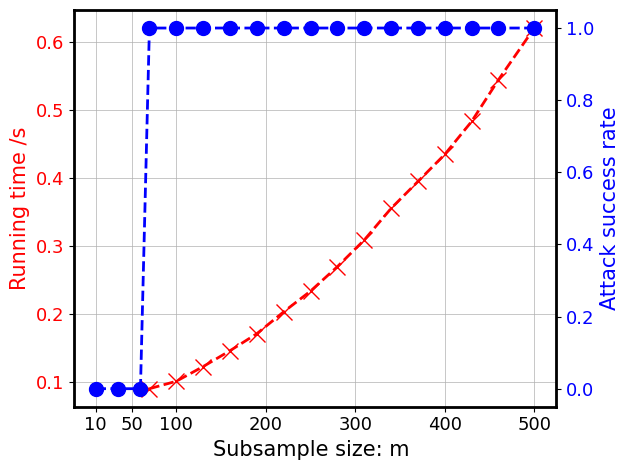

In [36]:
#stat


import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()  # 创建一个figure和一个axes


x_values= [80,100,130,160,190,220,250,280,310,340,370,400,430,460, 500]


x_values_success= [10,40,70,80,100,130,160,190,220,250,280,310,340,370,400,430,460, 500]

x_values_success = [10,
 35,
 60,
 70,
 100,
 130,
 160,
 190,
 220,
 250,
 280,
 310,
 340,
 370,
 400,
 430,
 460,
 500]
x_values = [70+30*i for i in range(15)]
x_values[-1] = 500

multi_coef = [0 if i < 3 else 1 for i in range(18)]


stat_coef = [0 if i < 3 else 1 for i in range(18)]

# Generate some dummy data for 'multi' and 'stat' since it's not provided

stat = stat_times
marker_size = 11

# 绘制第一条线，使用ax1，这将使用左边的y轴
ax1.plot(x_values, stat, label='Statistical attack', color='red', linestyle='--', marker='x', linewidth=2, markersize=marker_size)
ax1.set_xlabel('X values')
ax1.set_ylabel('Statistical attack values', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# 使用twinx创建第二个axes，共享相同的x轴
ax2 = ax1.twinx()  
#ax2.plot(x_values_success, stat_nfound, label='Statistical attack Nfound', color='blue', linestyle='--', linewidth=2)
ax2.plot(x_values_success, stat_coef, label='Secrets', color='blue', linestyle='--',marker='o', linewidth=2, markersize=marker_size-1)

fontsize=15
ax2.set_ylabel('Attack success rate', color='blue',fontsize=fontsize)
ax2.tick_params(axis='y', labelcolor='blue')

# Add grid lines
ax1.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax1.spines.values():
    spine.set_linewidth(2)
# Set axis labels
ax1.set_xlabel('Subsample size: m ', fontsize=fontsize)
ax1.set_ylabel('Running time /s', fontsize=fontsize)

# Set the legend to match the style in the second plot
#legend = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# 合并图例句柄和标签
handles = handles1 + handles2
labels = labels1 + labels2


ax1.set_xticks([10, 50,100,200,300,400,500])
ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)
plt.tight_layout()

# 保存为PDF格式
plt.savefig('./figure/true/purchase_stat.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('./figure/true/purchase_stat.png', bbox_inches='tight')

plt.show()


In [31]:
max_coefs = {}

# Iterate over all sets of filtered data
for dataset in all_filtered_data:
    # Iterate over each entry in the current set
    for entry in dataset:
        # Extract the Round number and Coef, converting Coef to an integer for comparison
        round_num = entry['Round']
        coef = int(entry['Coef'])
        # Update the dictionary with the maximum Coef found so far for each Round
        if round_num not in max_coefs or coef > max_coefs[round_num]:
            max_coefs[round_num] = coef

max_coefs

{'1': 10, '2': 10}